In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import import_ipynb
from Student_info import country_Student
from Student_info import student_info
from collections import Counter
import collections

In [5]:
student_purchases = pd.read_csv('dataSets/365_database/365_student_purchases.csv')
student_purchases
student_purchases['purchase_type'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [6]:
missing_country_df = student_info[student_info.isnull().any(axis=1)]
missing_country = missing_country_df['student_id'].tolist()
missing_country

[261725,
 262665,
 272144,
 278827,
 282654,
 282914,
 283704,
 283791,
 284550,
 284790,
 286959,
 290648,
 293967]

In [7]:
df = student_purchases.copy()

df_cleaned = df[~df['student_id'].isin(missing_country)]
student_purchases_cleaned = df_cleaned.reset_index(drop=True)
(student_purchases_cleaned)

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01
...,...,...,...,...
3035,23148,278055,Monthly,2022-10-20
3036,23150,270103,Annual,2022-10-20
3037,23151,270824,Monthly,2022-10-20
3038,23152,295497,Monthly,2022-10-20


In [8]:
country = []
i = 0
n = len(student_purchases_cleaned)-1

while (i<=n):
    x=student_purchases_cleaned['student_id'].loc[i]
    y=country_Student[x]
    country.append(y)
    i=i+1

In [9]:
print(len(country))
df_country = pd.DataFrame(country,columns = ['country'])
df_country

3040


,country
0,CA
1,US
2,NL
3,CA
4,CA
...,...
3035,ZW
3036,GB
3037,US
3038,NL


In [10]:
frames = [student_purchases_cleaned, df_country]

student_purchases_by_country = pd.concat(frames,axis = 1)

print(student_purchases_by_country.info())
# print(student_purchases_by_country.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   purchase_id     3040 non-null   int64 
 1   student_id      3040 non-null   int64 
 2   purchase_type   3040 non-null   object
 3   date_purchased  3040 non-null   object
 4   country         3040 non-null   object
dtypes: int64(2), object(3)
memory usage: 118.9+ KB
None


In [11]:
student_purchase_annual =student_purchases_by_country[student_purchases_by_country['purchase_type']=='Annual'].reset_index(drop=True)
student_purchase_quarterly =student_purchases_by_country[student_purchases_by_country['purchase_type']=='Quarterly'].reset_index(drop=True)
student_purchase_monthly =student_purchases_by_country[student_purchases_by_country['purchase_type']=='Monthly'].reset_index(drop=True)


In [12]:

annual_purchase = student_purchase_annual['date_purchased'].tolist()
annual = Counter(annual_purchase)

purchase_annual = pd.DataFrame.from_dict(annual,orient = 'index').reset_index()
# purchase_annual.to_excel('annual.xlsx')


quarterly_purchase = student_purchase_quarterly['date_purchased'].tolist()
quarterly = Counter(quarterly_purchase)

purchase_quarterly = pd.DataFrame.from_dict(quarterly,orient = 'index').reset_index()
# purchase_quarterly.to_excel('quarterly.xlsx')


monthly_purchase = student_purchase_monthly['date_purchased'].tolist()
monthly = Counter(monthly_purchase)

purchase_monthly = pd.DataFrame.from_dict(monthly,orient = 'index').reset_index()
# purchase_monthly.to_excel('monthly.xlsx')

From the above dataframe we can track the number and type of subscriptions purchased across time.

<mark>'date_purchased'</mark> will be extracted from these dataframes, exported as Excel files and then, visualized (line graphs? in Tableau Public.

#### Update:

I think it will be easier to visualize if I export the necessary data to excel in the form of a dictionary.

And hence, I will use the Counter() function from the collection module to create a dictionary from a list of values.

Export the said dictionary to Excel and try visualizing.

In [15]:
purchase_dates = student_purchases_by_country['date_purchased'].value_counts().to_dict()


In [18]:
od = collections.OrderedDict(sorted(purchase_dates.items()))
od

OrderedDict([('2022-01-01', 7),
             ('2022-01-02', 3),
             ('2022-01-03', 4),
             ('2022-01-04', 6),
             ('2022-01-05', 3),
             ('2022-01-06', 3),
             ('2022-01-07', 4),
             ('2022-01-08', 6),
             ('2022-01-09', 8),
             ('2022-01-10', 11),
             ('2022-01-11', 6),
             ('2022-01-12', 9),
             ('2022-01-13', 7),
             ('2022-01-14', 5),
             ('2022-01-15', 6),
             ('2022-01-16', 4),
             ('2022-01-17', 5),
             ('2022-01-18', 11),
             ('2022-01-19', 13),
             ('2022-01-20', 10),
             ('2022-01-21', 10),
             ('2022-01-22', 14),
             ('2022-01-23', 8),
             ('2022-01-24', 11),
             ('2022-01-25', 18),
             ('2022-01-26', 26),
             ('2022-01-27', 33),
             ('2022-01-28', 20),
             ('2022-01-29', 1),
             ('2022-01-30', 1),
             ('2022-01-31', 4

<function matplotlib.pyplot.show(close=None, block=None)>

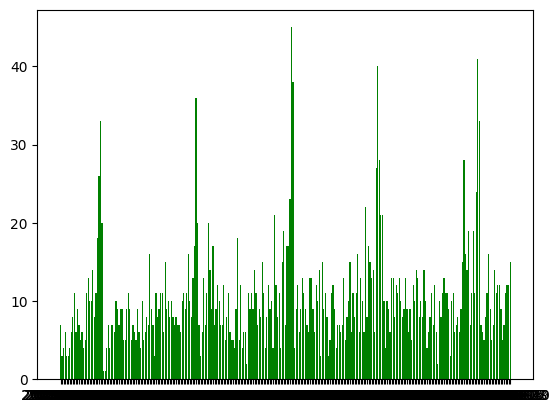

In [19]:
plt.bar(list(od.keys()),od.values(),color='g')
plt.show